# Simple Linear Regression

### Build a model which predicts sales based on the money spent on different platforms for marketing

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Exploring our dataset

In [2]:
advertising = pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Time to do some Visualization

In [7]:
correlation = advertising.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


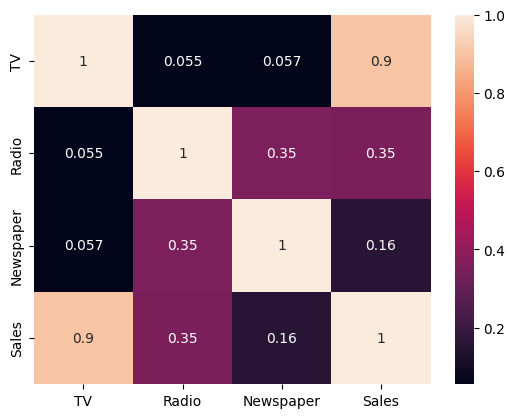

In [8]:
sns.heatmap(correlation, annot=True)
plt.show()

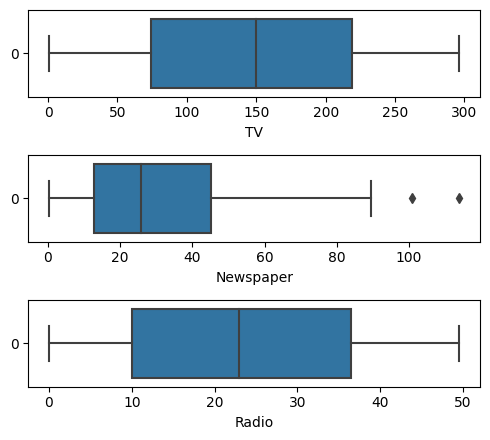

In [9]:
fig, axs = plt.subplots(3, figsize = (5,4.5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1], orient='h')
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2], orient='h')
plt1.set_xlabel('TV')
plt2.set_xlabel('Newspaper')
plt3.set_xlabel('Radio')
plt.tight_layout()

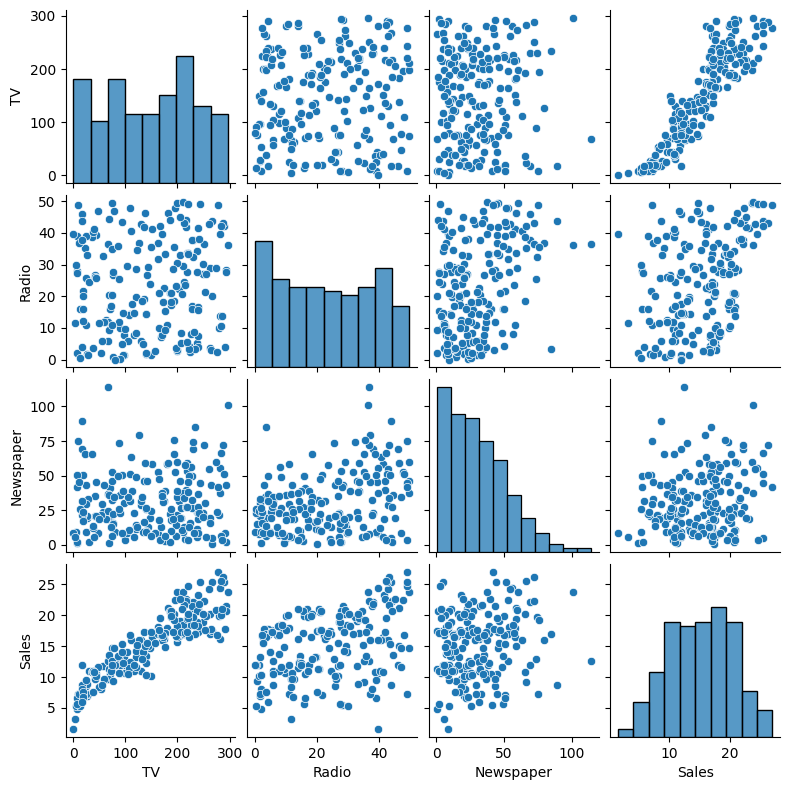

In [10]:
sns.pairplot(advertising, height=2, aspect=1, kind='scatter')
plt.show()

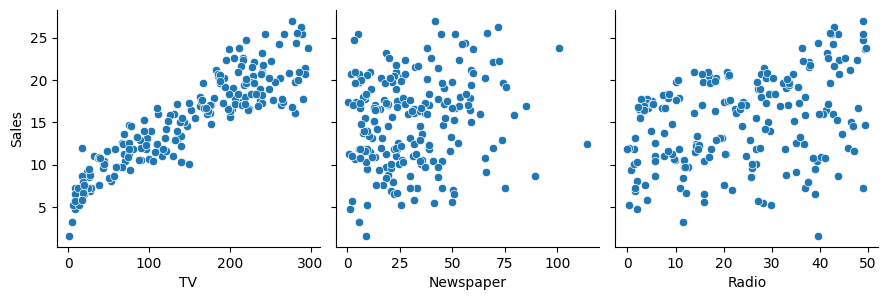

In [11]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()

### choosing TV as independent variable and Sales as depenent variable

In [12]:
X = advertising['TV']
y = advertising['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 44)

In [14]:
y_train.shape


(140,)

In [15]:
X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

In [16]:
coefficients = model.params
coefficients

const    6.572498
TV       0.058265
dtype: float64

In [17]:
intercept = coefficients[0]
slope = coefficients[1]

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     670.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           7.75e-55
Time:                        01:42:54   Log-Likelihood:                -315.16
No. Observations:                 140   AIC:                             634.3
Df Residuals:                     138   BIC:                             640.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5725      0.385     17.062      0.000       5.811       7.334
TV             0.0583      0.002     25.896      0.000       0.054       0.063
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.187
Skew:                          -0.063   Prob(JB):                        0.911
Kurtosis:                       2.872   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

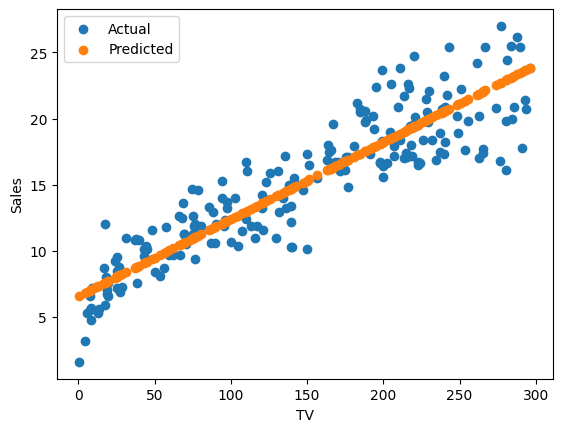

In [19]:
plt.scatter(advertising.TV, advertising.Sales, label='Actual')
plt.scatter(advertising.TV, intercept + slope*advertising.TV, label='Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Testing our model

In [20]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)
d = pd.DataFrame({'actual': y_test, 'predicted':y_pred})
d.head()

,actual,predicted
135,11.6,9.386712
73,11.0,14.112028
157,10.1,15.300640
28,18.9,21.068905
23,20.5,19.874466


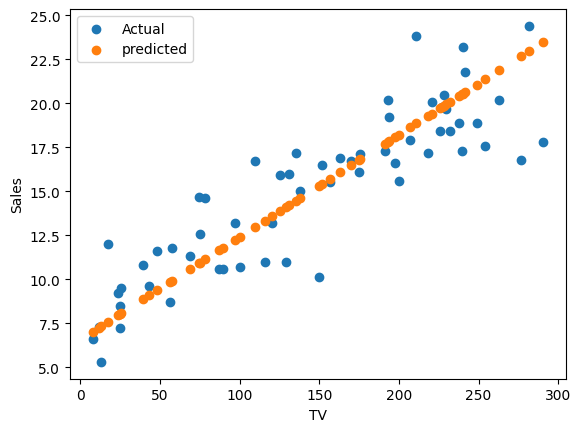

In [21]:
plt.scatter(X_test, y_test, label = 'Actual')
plt.scatter(X_test, d.predicted, label = 'predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Calculating RMSE

In [22]:
np.sqrt(((d['actual'] - d['predicted'])**2).sum()/60)

2.293212682024496

## Coefficient of Determination

In [23]:
r2_score(y_test, y_pred)

0.7418242381629321